In [1]:
# Loan_ID 	Loan reference number

# Gender 	Applicant gender - (Male or Female)

# Married 	Applicant marital status (Married or not married) 

# Dependents 	Number of family members 	0; 1; 2; 3+

# Education 	Applicant education/qualification 
# (graduate or not graduate) 	Graduate; Under Graduate

# Self_Employed 	Applicant employment status
# (yes for self-employed, no for employed/others) 	Yes; No

# ApplicantIncome 	Applicant's monthly salary/income

# CoapplicantIncome 	Additional applicant's monthly salary/income 

# LoanAmount 	Loan amount 

# Loan_Amount_Term 	 The loan's repayment period (in days) 

# Credit_History 	 Records of previous credit history
# (0: bad credit history, 1: good credit history) 	0; 1

# Property_Area 	The location of property
# (Rural/Semiurban/Urban) 	Rural; Semiurban; Urban

# Loan_Status 	Status of loan
# (Y: accepted, N: not accepted)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [3]:
df = pd.read_csv('loan_data.csv')
df.shape

(614, 13)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data preprocessing

#### 1) Detect Null values

#### Function to display Feature,Null_Count,Percent_Null

In [5]:
def fetch_null_count_percent(data):
    nv = data.isnull().sum()
    nv= nv[nv>0]
    nv_df = pd.DataFrame({'Feature':nv.index,'Count':nv.values,
                         'Percent':(nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('Percent',ascending=False)
    return nv_df

In [6]:
nv_df = fetch_null_count_percent(df)
nv_df

,Feature,Count,Percent
6,Credit_History,50,8.143322
3,Self_Employed,32,5.211726
4,LoanAmount,22,3.583062
2,Dependents,15,2.442997
5,Loan_Amount_Term,14,2.280130
0,Gender,13,2.117264
1,Married,3,0.488599


#### 2) Handle duplicates

In [7]:
df.duplicated().sum()   

0

#### 3) Check data types

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Separate Num and Cat features

In [9]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [10]:
for i in cat_cols:
    print(i,df[i].nunique())

Loan_ID 614
Gender 2
Married 2
Dependents 4
Education 2
Self_Employed 2
Property_Area 3
Loan_Status 2


In [11]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [12]:
# dt,str,loc,iloc
df['Dependents'] = df['Dependents'].str.replace('+','')

In [13]:
df['Dependents'] = pd.to_numeric(df['Dependents'])
# OR
# df['Dependents'] = df['Dependents'].astype(int)

In [14]:
nv_df

,Feature,Count,Percent
6,Credit_History,50,8.143322
3,Self_Employed,32,5.211726
4,LoanAmount,22,3.583062
2,Dependents,15,2.442997
5,Loan_Amount_Term,14,2.280130
0,Gender,13,2.117264
1,Married,3,0.488599


In [15]:
df['Dependents']  = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [16]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [17]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [18]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [19]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [20]:
df['LoanAmount'].value_counts()

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

In [21]:
print(df['LoanAmount'].mean(),df['LoanAmount'].median())

146.41216216216216 128.0


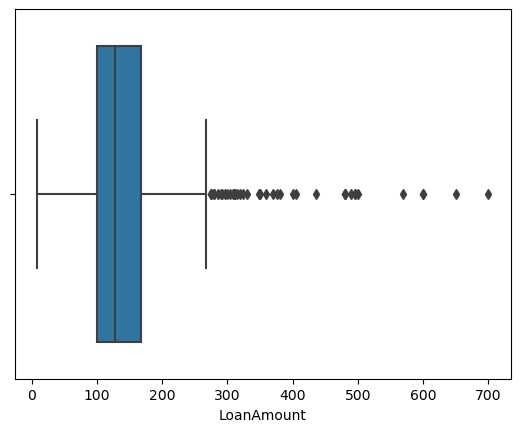

In [22]:
sns.boxplot(x=df['LoanAmount'])
plt.show()

In [23]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [24]:
nv_df = fetch_null_count_percent(df)
nv_df

,Feature,Count,Percent
3,Credit_History,50,8.143322
1,Self_Employed,32,5.211726
2,Loan_Amount_Term,14,2.280130
0,Married,3,0.488599


In [25]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

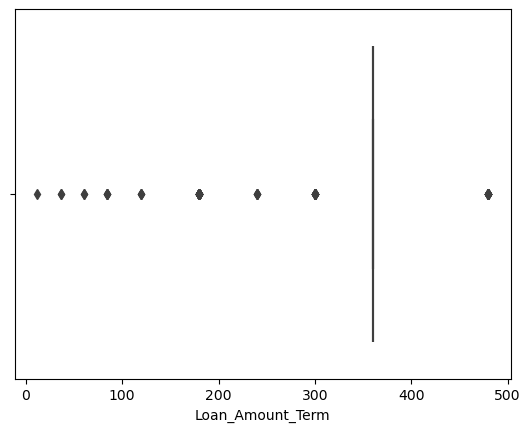

In [26]:
sns.boxplot(x=df['Loan_Amount_Term'])
plt.show()

In [27]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(
    df['Loan_Amount_Term'].mode()[0])

In [28]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [29]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [30]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [31]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [32]:
df.groupby(['Loan_Status','Credit_History'])['Credit_History'].count()

Loan_Status  Credit_History
N            0.0                82
             1.0                97
Y            0.0                 7
             1.0               378
Name: Credit_History, dtype: int64

In [33]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [34]:
fetch_null_count_percent(df)

,Feature,Count,Percent
0,Self_Employed,32,5.211726


In [35]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [36]:
df.groupby(['Education','Self_Employed'])['Self_Employed'].count()

Education     Self_Employed
Graduate      No               389
              Yes               65
Not Graduate  No               111
              Yes               17
Name: Self_Employed, dtype: int64

In [37]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [38]:
fetch_null_count_percent(df)

,Feature,Count,Percent


#### Check Data Consistency

In [39]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,1.009623,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


#### EDA

In [40]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


#### Univariate
Cat - countplot

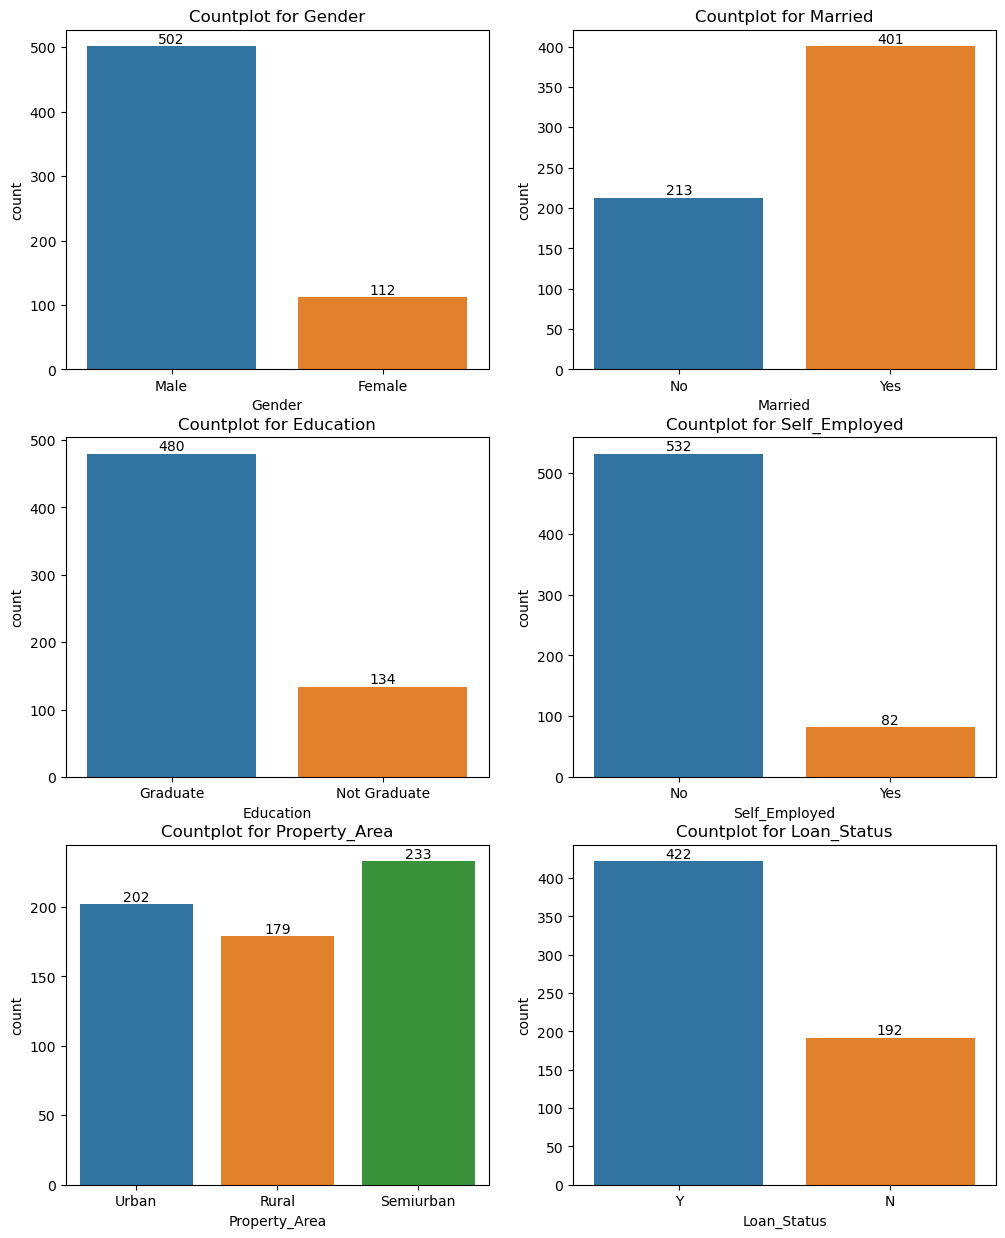

In [41]:
cols = cat_cols[1:]
plt.figure(figsize=(12,15))
for i in range(len(cols)):  # i = 0,1,2,3,4,5
    plt.subplot(3,2,i+1)
    ax = sns.countplot(x=df[cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cols[i]}')
plt.show()

In [42]:
df['Dependents'].value_counts()

Dependents
0.0    360
1.0    102
2.0    101
3.0     51
Name: count, dtype: int64

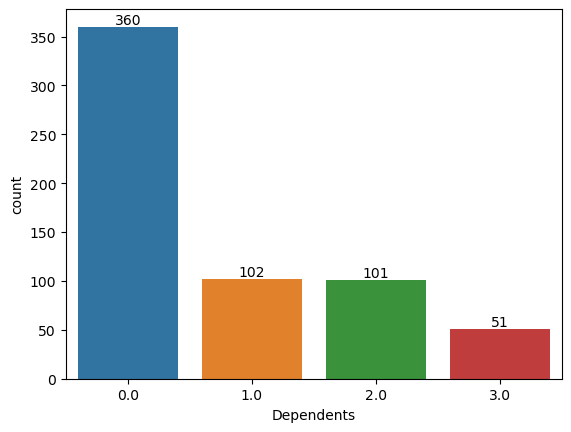

In [43]:
ax = sns.countplot(x=df['Dependents'])
ax.bar_label(ax.containers[0])
plt.show()

#### Univarite
num - histplot / kdeplot

C:\Users\rahul sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rahul sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rahul sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rahul sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

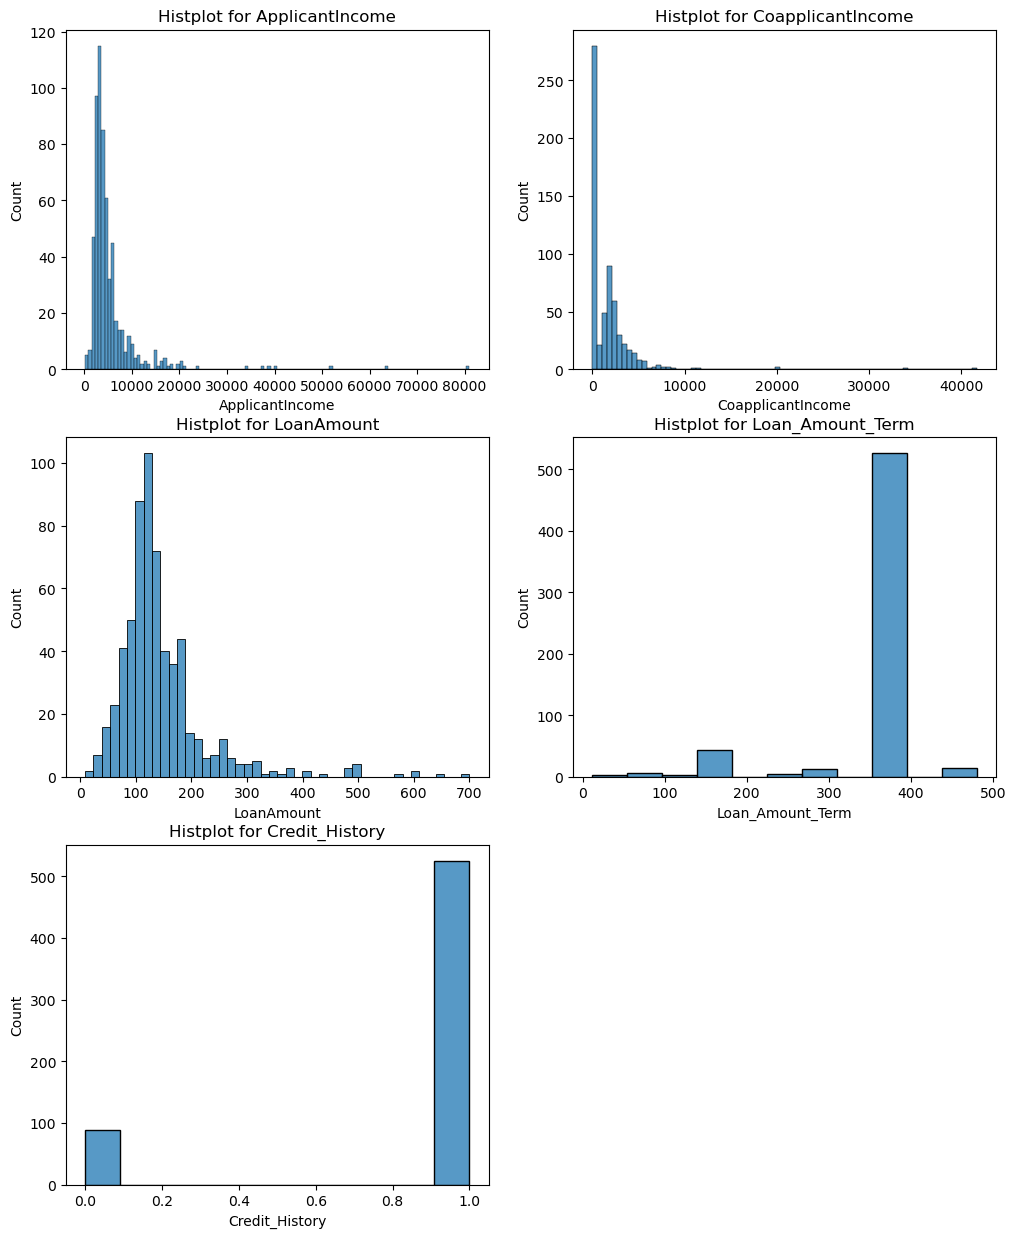

In [44]:
# num_cols
cols = num_cols[1:]
plt.figure(figsize=(12,15))
for i in range(len(cols)):  # i = 0,1,2,3,4,5
    plt.subplot(3,2,i+1)
    sns.histplot(x=df[cols[i]])
    plt.title(f'Histplot for {cols[i]}')
plt.show()

#### Inference
1) ApplicaIncome, CoApplicantIncome and LoanAmount are right skewed.

#### Bivariate
Cat-Cat

In [45]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [46]:
df['Loan_Amount_Term'].nunique()

10

In [47]:
df['Loan_Amount_Term'].dtypes

dtype('float64')

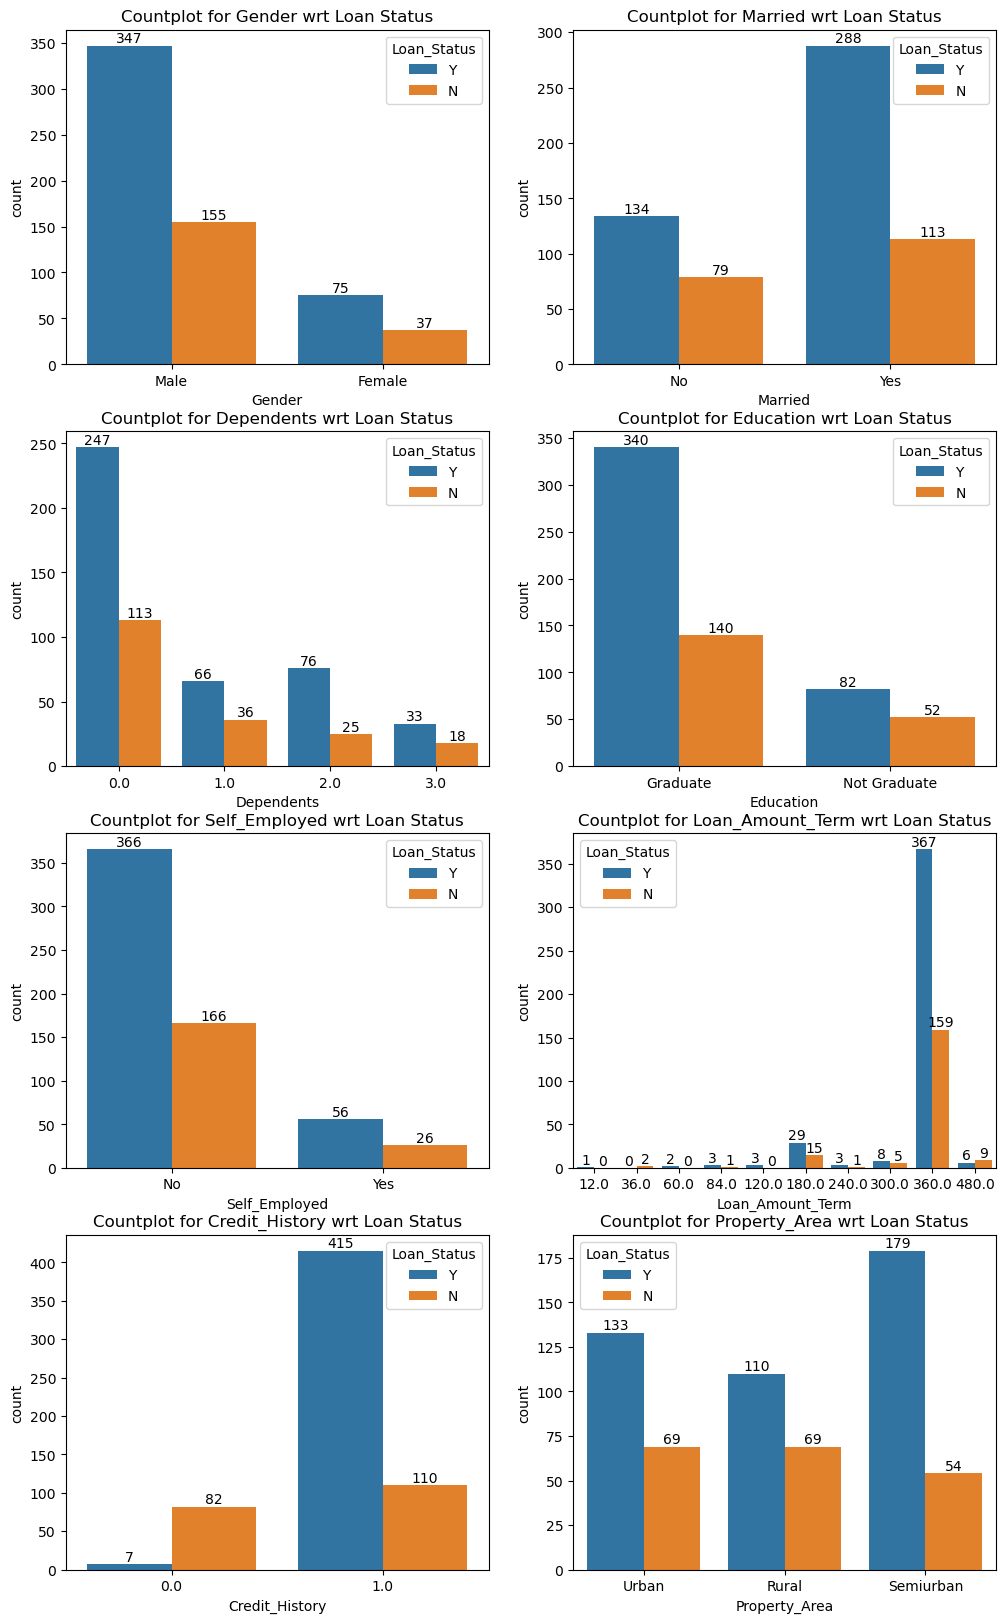

In [48]:
cols = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History',
        'Property_Area']
plt.figure(figsize=(12,20))
for i in range(len(cols)):  # i = 0,1,2,3,4,5
    plt.subplot(4,2,i+1)
    ax =sns.countplot(x=df[cols[i]],hue=df['Loan_Status'])
    plt.title(f'Countplot for {cols[i]} wrt Loan Status')
    for i in ax.containers:
        plt.bar_label(i)
plt.show()

#### Num-Cat

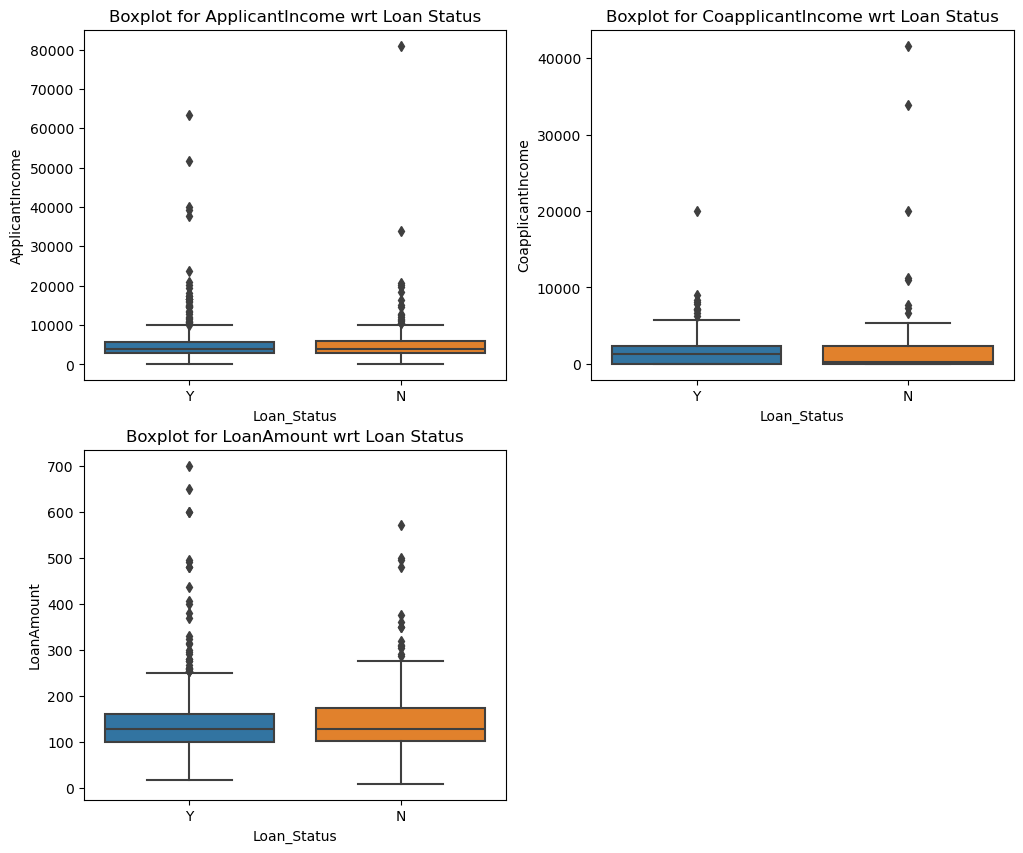

In [49]:
cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
plt.figure(figsize=(12,10))
for i in range(len(cols)):  # i = 0,1,2,3,4,5
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df['Loan_Status'],y=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]} wrt Loan Status')
plt.show()

In [50]:
df['LoanAmount'].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [51]:
df['Loan_Amt_Grp'] = pd.cut(df['LoanAmount'],bins=[9,100,200,300,400,
                                                   500,600,700])
df['Loan_Amt_Grp'].value_counts()

Loan_Amt_Grp
(100, 200]    380
(9, 100]      153
(200, 300]     51
(300, 400]     15
(400, 500]      9
(500, 600]      3
(600, 700]      2
Name: count, dtype: int64

In [52]:
df.groupby(['Loan_Amt_Grp','Loan_Status'])['Loan_Status'].count()

C:\Users\rahul sharma\AppData\Local\Temp\ipykernel_21308\1967776001.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Loan_Amt_Grp','Loan_Status'])['Loan_Status'].count()


Loan_Amt_Grp  Loan_Status
(9, 100]      N               46
              Y              107
(100, 200]    N              114
              Y              266
(200, 300]    N               19
              Y               32
(300, 400]    N                8
              Y                7
(400, 500]    N                3
              Y                6
(500, 600]    N                1
              Y                2
(600, 700]    N                0
              Y                2
Name: Loan_Status, dtype: int64

#### Outliers Treatment 

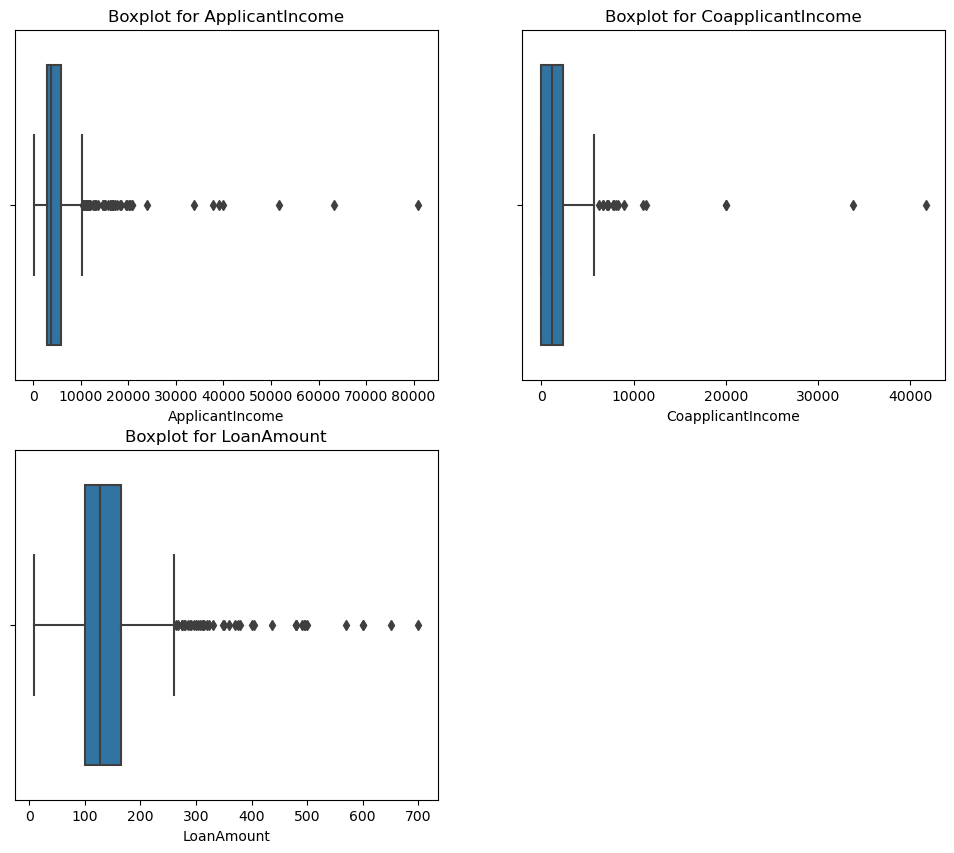

In [53]:
cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
plt.figure(figsize=(12,10))
for i in range(len(cols)):  # i = 0,1,2,3,4,5
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')
plt.show()

In [54]:
cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
a1 = df[cols].describe(percentiles=[0.01,0.02,0.45,0.95,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,45%,50%,95%,97%,98%,99%,max
ApplicantIncome,150.0,1025.00,1554.12,3597.85,3812.5,14583.0,16682.25,19666.04,32540.41,81000.0
CoapplicantIncome,0.0,0.00,0.00,241.70,1188.5,4997.4,5682.67,7198.56,8895.89,41667.0
LoanAmount,9.0,30.65,44.00,123.85,128.0,293.4,356.10,427.94,495.87,700.0


In [55]:
print(df[df['ApplicantIncome']>19666.04].shape)
print(df[df['ApplicantIncome']>32540.41].shape)

(13, 14)
(7, 14)


In [56]:
df1 = df.copy()

In [57]:
cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for i in cols:
    upper = df[i].quantile(0.98)
    df[i] = np.where(df[i]>upper,upper,df[i])

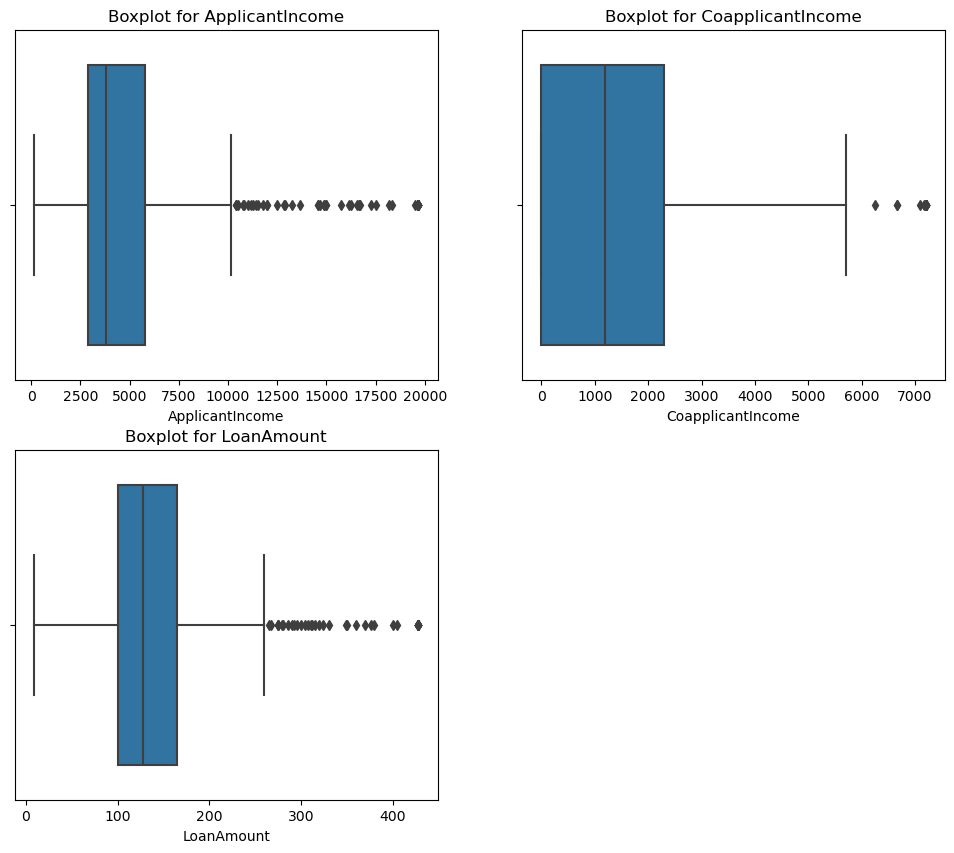

In [58]:
cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
plt.figure(figsize=(12,10))
for i in range(len(cols)):  # i = 0,1,2,3,4,5
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')
plt.show()

In [59]:
df.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents            float64
Education              object
Self_Employed          object
ApplicantIncome       float64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
Loan_Amt_Grp         category
dtype: object

In [60]:
cols_to_encode = ['Gender','Married','Education','Self_Employed',
                 'Property_Area']
print(df.shape)

(614, 14)


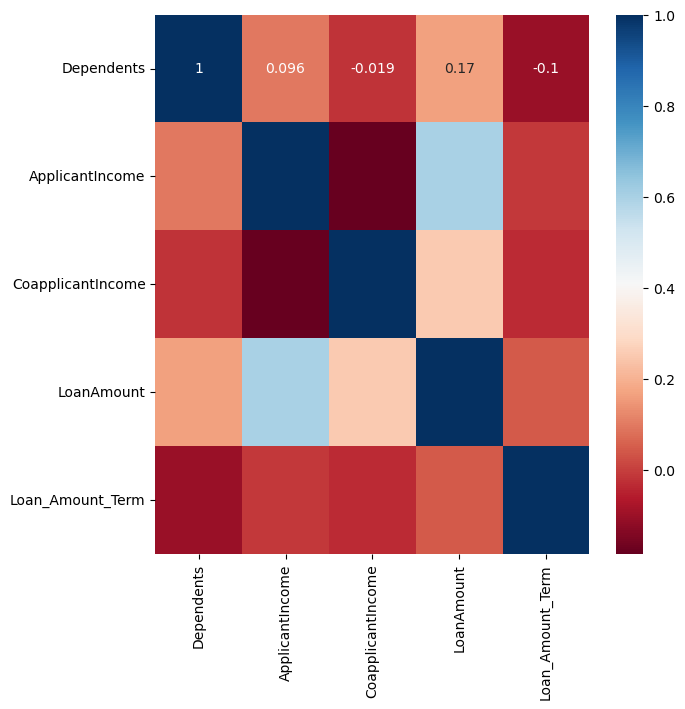

In [61]:
corr = df[num_cols[:-1]].corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr,annot = True,cmap ='RdBu')
plt.show()

In [62]:
df_dum = pd.get_dummies(data=df,columns=cols_to_encode,dtype=int,
                       drop_first=True)
print(df_dum.shape)
print(df_dum.columns)

(614, 15)
Index(['Loan_ID', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Loan_Amt_Grp', 'Gender_Male', 'Married_Yes', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')


#### Select x and y

In [63]:
x = df_dum.drop(['Loan_ID','Loan_Status','Loan_Amt_Grp'],axis=1)
y = df_dum['Loan_Status']
print(x.shape,y.shape)

(614, 12) (614,)


#### Split data into train and test

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(429, 12) (185, 12)
(429,) (185,)


#### FUnction for Model Evaluation

In [66]:
from sklearn.metrics import *

In [67]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)  # TP, TN, FP, FN
    crep = classification_report(ytest,ypred)
    print(cm)
    print(crep)

#### Model Building

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lr1 = LogisticRegression(max_iter=1000,random_state=70)     ## ceate instance of model
lr1.fit(x_train,y_train)                    ## Train ML model on x_train, y_train

LogisticRegression(max_iter=1000, random_state=70)

In [70]:
print('Train_Score',lr1.score(x_train,y_train))  # Train Acc
print('Test_Score',lr1.score(x_test,y_test))     # Test Acc

Train_Score 0.8181818181818182
Test_Score 0.7783783783783784


#### Inderence
Model is Overfit

In [71]:
ypred_lr1 = lr1.predict(x_test)
eval_model(y_test,ypred_lr1)
# positive = Y, Negative = N
# [TN FP]
# [FN TP]

[[ 26  39]
 [  2 118]]
              precision    recall  f1-score   support

           N       0.93      0.40      0.56        65
           Y       0.75      0.98      0.85       120

    accuracy                           0.78       185
   macro avg       0.84      0.69      0.71       185
weighted avg       0.81      0.78      0.75       185



### Treatment of Overfitting in LogReg:
Parameters:<br>
    penalty : Used to decide the type of regularization - L2 or L1<br>
    C : C = 1/alpha, where alpha is the regularization coefficient<br>


In [72]:
lr2 = LogisticRegression(max_iter=1000,penalty='l2',C=0.543)  # 543
lr2.fit(x_train,y_train)

LogisticRegression(C=0.543, max_iter=1000)

In [73]:
print('LogReg without Regularization')
print('Train_Score',lr1.score(x_train,y_train))  # Train Acc
print('Test_Score',lr1.score(x_test,y_test))     # Test Acc

print('LogReg with Regularization')
print('Train_Score',lr2.score(x_train,y_train))  # Train Acc
print('Test_Score',lr2.score(x_test,y_test))     # Test Acc

LogReg without Regularization
Train_Score 0.8181818181818182
Test_Score 0.7783783783783784
LogReg with Regularization
Train_Score 0.8181818181818182
Test_Score 0.7837837837837838


#### ROC - AUC

TPR(y-axis).FPR(x-axis) line chart

In [74]:
print(ypred_lr1[60:70])

['N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']


In [75]:
ypred_proba = lr1.predict_proba(x_test)
ypred_proba[60:70]
#predic_proba = prob(N) and prob(Y)

array([[0.5232328 , 0.4767672 ],
       [0.08409905, 0.91590095],
       [0.76209962, 0.23790038],
       [0.26344426, 0.73655574],
       [0.25798404, 0.74201596],
       [0.38644448, 0.61355552],
       [0.09254257, 0.90745743],
       [0.05208289, 0.94791711],
       [0.2379577 , 0.7620423 ],
       [0.40037677, 0.59962323]])

In [76]:
from sklearn.metrics import roc_curve,roc_auc_score

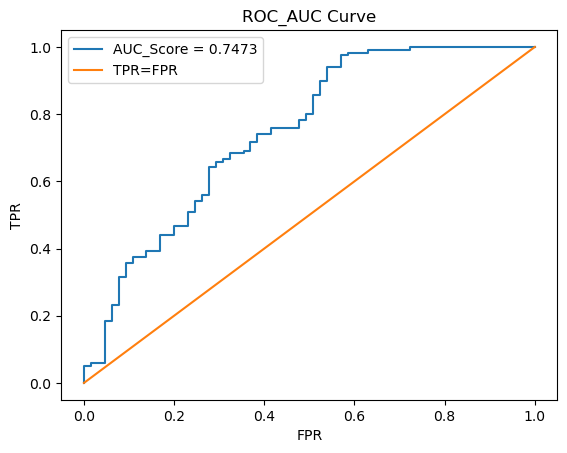

In [77]:
fpr,tpr,thresh = roc_curve(y_test,ypred_proba[:,1:],pos_label = 'Y')
auc_score = roc_auc_score(y_test,ypred_proba[:,1:])
plt.plot(fpr,tpr,label =f'AUC_Score = {round(auc_score,4)}')
plt.plot([0,1],[0,1],label = 'TPR=FPR')
plt.title('ROC_AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

#### Best Threshold

default Threshold in Logreg =0.5

In [78]:
print(len(tpr),len(fpr),len(thresh))

62 62 62


In [79]:
best_thresh = thresh[np.argmax(np.abs(tpr*(1-fpr)))]
print(best_thresh)

0.7401107458003491


In [80]:
ypred_lr1_best_thresh = np.where(ypred_proba[:,1:]>best_thresh,'Y','N')


In [81]:
cm_best_th = confusion_matrix(y_test,ypred_lr1_best_thresh)
crep_best_th = classification_report(y_test,ypred_lr1_best_thresh)
print(cm_best_th)
print(crep_best_th)

#42 => applicants whose loan sholuld have been approved but got rejected
# 19 => applicants whose loan sholuld have been rejected but got approved

[[46 19]
 [42 78]]
              precision    recall  f1-score   support

           N       0.52      0.71      0.60        65
           Y       0.80      0.65      0.72       120

    accuracy                           0.67       185
   macro avg       0.66      0.68      0.66       185
weighted avg       0.71      0.67      0.68       185



#### Feuture Selection Methods


In [82]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

#### chi model

In [83]:
k = 8
selector = SelectKBest(score_func=chi2,k=k)
x_selected = selector.fit_transform(x,y)

In [84]:
(selector.scores_)

array([8.59527587e-02, 2.29301541e+00, 1.97112509e+01, 4.31122113e+01,
       3.77855372e+00, 2.60058772e+01, 3.62343084e-02, 1.78242499e+00,
       3.54050246e+00, 7.28480330e-03, 7.10309328e+00, 7.83945938e-01])

In [85]:
selected_indices = np.argsort(selector.scores_)[::-1][:k]
selected_features = x.columns[selected_indices]
print(selected_features)

Index(['LoanAmount', 'Credit_History', 'CoapplicantIncome',
       'Property_Area_Semiurban', 'Loan_Amount_Term', 'Education_Not Graduate',
       'ApplicantIncome', 'Married_Yes'],
      dtype='object')


In [86]:
x1 = x[selected_features]
print(x1.columns)

Index(['LoanAmount', 'Credit_History', 'CoapplicantIncome',
       'Property_Area_Semiurban', 'Loan_Amount_Term', 'Education_Not Graduate',
       'ApplicantIncome', 'Married_Yes'],
      dtype='object')


In [87]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y,test_size=0.3,
                                                random_state=42)

In [88]:
lr3 = LogisticRegression(max_iter=1000)
lr3.fit(x_train1,y_train1)

LogisticRegression(max_iter=1000)

In [89]:
print('Train Score',lr3.score(x_train1,y_train1))     #train acc
print('Test Score',lr3.score(x_train1,y_train1))      #test acc


Train Score 0.8181818181818182
Test Score 0.8181818181818182
